In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
cd '/content/drive/MyDrive/GitHub/Stock_and_Forum/Visualization'

/content/drive/MyDrive/GitHub/Stock_and_Forum/Visualization


In [13]:
stock = pd.read_csv('./data/stock.csv')
stock_p = pd.read_csv('./data/stock_processed.csv')
with open('./data/naverforum1.json') as f:
    forum = json.load(f)
with open('./data/naverforum2.json') as f:
    forum2 = json.load(f)
forum.extend(forum2)

In [14]:
print(stock.shape, stock_p.shape, len(forum))

(2600, 15) (2600, 25) 210672


In [15]:
stock.head()

,date,code,name,market_cap,price,open_price,high_price,low_price,gap,gap_ratio,trading_volume,institutional_volume,foreign_volume,foreign_ratio,forum_url
0,2022-03-04,91990,셀트리온헬스케어,101720,65600,67200,68000,65300,2000,-2.96,694758,235101,-75982,17.27,https://finance.naver.com/item/board.naver?cod...
1,2022-03-04,247540,에코프로비엠,88652,386800,390000,396700,385900,5700,-1.45,170609,-16500,-45223,13.94,https://finance.naver.com/item/board.naver?cod...
2,2022-03-04,66970,엘앤에프,68924,198000,201500,203600,197200,6000,-2.94,346107,11155,-16899,20.73,https://finance.naver.com/item/board.naver?cod...
3,2022-03-04,263750,펄어비스,65228,98500,100700,100800,97600,3100,-3.05,397795,36794,-53802,14.39,https://finance.naver.com/item/board.naver?cod...
4,2022-03-04,293490,카카오게임즈,56408,72600,75000,75000,72300,3000,-3.97,746349,-1915,-116357,10.94,https://finance.naver.com/item/board.naver?cod...


In [16]:
stock_p.head()

,code,created,name,market_cap,price,open_price,high_price,low_price,gap,gap_ratio,...,forum_count,forum_view,forum_like,forum_unlike,forum_title_length_avg,forum_content_length_avg,forum_reply_count,year,month,day
0,5290,2022-02-18,동진쎄미켐,17969,34950,34150,35150,34050,50,0.14,...,27.0,8896.0,90.0,81.0,12.111111,53.925926,29.0,2022,2,18
1,96530,2022-02-18,씨젠,26217,50200,50000,50800,49050,200,0.40,...,543.0,58920.0,1283.0,565.0,15.088398,81.845310,310.0,2022,2,18
2,25900,2022-02-18,동화기업,14161,70100,68300,70800,68300,100,0.14,...,1.0,134.0,1.0,0.0,7.000000,70.000000,0.0,2022,2,18
3,67160,2022-02-18,아프리카TV,16162,140600,142500,143500,140000,4700,-3.23,...,32.0,7469.0,45.0,25.0,13.625000,33.406250,24.0,2022,2,18
4,278280,2022-02-18,천보,28870,288700,279100,292800,278200,2200,0.77,...,26.0,7440.0,36.0,4.0,12.769231,41.923077,25.0,2022,2,18


In [17]:
forum[0]

{'_id': {'$oid': '6221c1dcbb9bb946682fa3d5'},
 'code': '091990',
 'content': 'ㅎㅎ',
 'datetime': {'$date': {'$numberLong': '1646407800000'}},
 'id': 'seod****',
 'like': 0,
 'name': '셀트리온헬스케어',
 'reply': [{'content': 'ㅋㅋ', 'dislike': 0, 'like': 0, 'response': []}],
 'reply_count': 1,
 'title': '거봐 3퍼이상 못빼지',
 'unlike': 4,
 'view': 166}

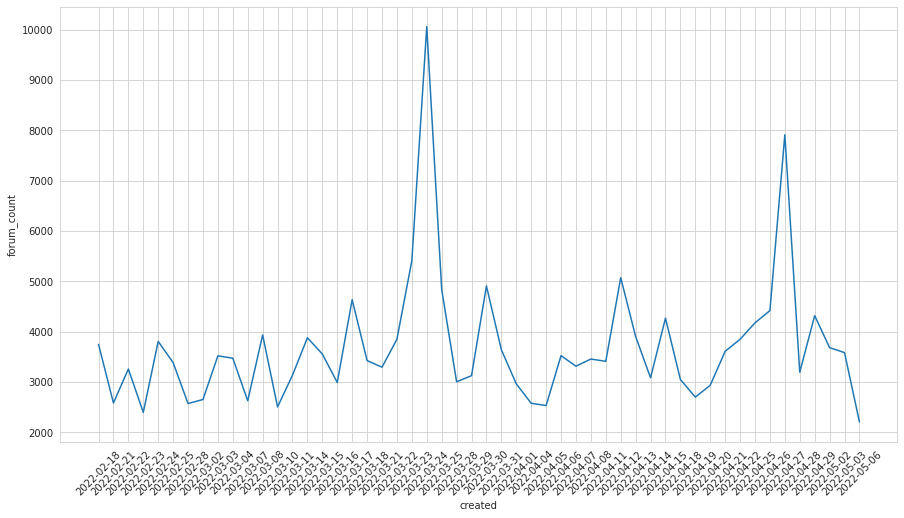

In [18]:
df_count_per_day = stock_p.groupby('created').agg({'forum_count':np.sum}).reset_index()

plt.figure(figsize = (15,8))
sns.lineplot(x='created', y='forum_count', data=df_count_per_day)
plt.xticks(rotation=45)
plt.show()